In [2]:
import numpy as np 
import random 
from numpy import linalg as lag
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation 
from IPython.display import HTML
from flock import *

0.08180954288992796


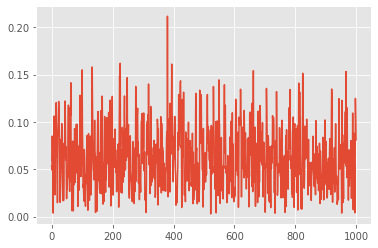

In [3]:
b = Flock(200,10,500)
order_stat = Flock.calculate_order_stat(b)
print(order_stat)
order_stat_list = []
for i in range(0,1000):
    b.update_posdirs(0.1,1)
    order_stat_list.append(Flock.calculate_order_stat(b))

x = np.arange(0,1000,1)
plt.plot(x,order_stat_list)

#Some simple plotting ignore


In [16]:
#creates a flock of 200 birds, speed 0.5 in a box 15 times their radius view
def plot_order_stat(sigma,B=10,T=200):
    f = Flock(200,0.5,15)
    ts = np.zeros((B,T))
    vops =np.zeros((B,T))
    for i in range(B):
        ts[i],vops[i] = f.plot_order_stat(1,T,sigma,display=False,plot=False)
        f.reset()
    fig,ax = plt.subplots()
    ax.plot(ts[0],vops.transpose())

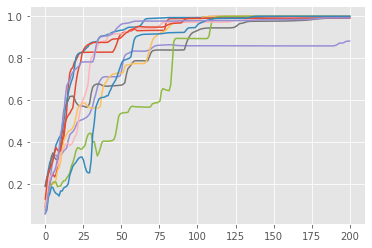

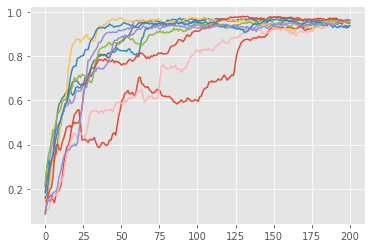

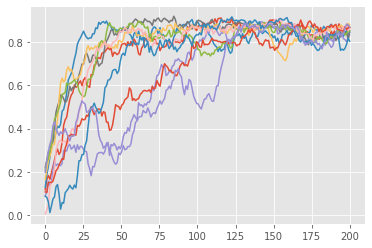

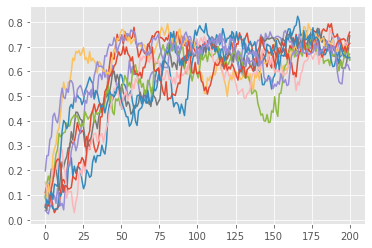

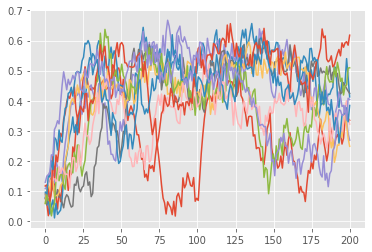

In [17]:
# plot_order_stat(0)
# plot_order_stat(0.2)
# plot_order_stat(0.4)
# plot_order_stat(0.6)
# plot_order_stat(0.8)